In [1]:
import os, sys

sys.path.append(os.path.abspath(os.path.join("../src")))

In [2]:
from hydra import initialize, compose
import hydra

with initialize(version_base=None, config_path="../configs/"):
    cfg = compose(config_name="train.yaml", overrides=["model=deformable_detr"])

In [3]:
cfg

{'task_name': 'train', 'tags': ['dev'], 'train': True, 'test': True, 'ckpt_path': None, 'seed': 1, 'matmul_precision': 'high', 'model': {'_target_': 'models.deformable_detr_module.DeformableDETRModule', 'optimizer': {'lr': 0.0002, 'lr_backbone': 2e-05, 'lr_drop': 20, 'lr_gamma': 0.5, 'lr_linear_proj_mult': 0.1, 'weight_decay': 0.0001}, 'net': {'_target_': 'models.deformable_detr.build', 'num_classes': 12, 'with_box_refine': False, 'two_stage': False, 'frozen_weights': None, 'backbone': 'resnet50', 'dilation': False, 'position_embedding': 'sine', 'position_embedding_scale': 6.28318530718, 'num_feature_levels': 4, 'enc_layers': 6, 'dec_layers': 6, 'dim_feedforward': 1024, 'hidden_dim': 256, 'dropout': 0.1, 'nheads': 8, 'num_queries': 300, 'dec_n_points': 4, 'enc_n_points': 4, 'aux_loss': True, 'set_cost_class': 2, 'set_cost_bbox': 5, 'set_cost_giou': 2, 'dice_loss_coef': 1, 'giou_loss_coef': 2, 'bbox_loss_coef': 5, 'cls_loss_coef': 2, 'focal_alpha': 0.25}, 'compile': False}, 'callbacks':

In [4]:
from models.deformable_detr_module import DeformableDETRModule
import torch

In [5]:
model = hydra.utils.instantiate(cfg.model)
model = model.cuda()
checkpoint = torch.load("../checkpoints/last.ckpt")
model.load_state_dict(checkpoint["state_dict"])

<All keys matched successfully>

In [6]:
def load_image(name):
    import cv2

    img = cv2.imread(f"../datasets/bdd100k/images/100k/val/{name}.jpg")
    img = img.transpose(2, 0, 1)[None, ...]
    img = torch.tensor(img).float().cuda()

    return img

In [7]:
light_image = load_image("b1c9c847-3bda4659")
dark_image = load_image("b1c81faa-3df17267")

In [15]:
def visualize_feature_map(feature_map):
    """
    Shape of feature map: (C, H, W)
    """
    import matplotlib.pyplot as plt

    row = 4
    col = 4

    plt.figure(figsize=(20, 10))

    for i in range(min(row * col, feature_map.shape[0])):
        plt.subplot(row, col, i + 1)
        plt.imshow(feature_map[i, :, :].cpu().detach().numpy())
        plt.axis("off")
    plt.show()

In [13]:
light_output = model.backbone[0].body(light_image)
dark_output = model.backbone[0].body(dark_image)

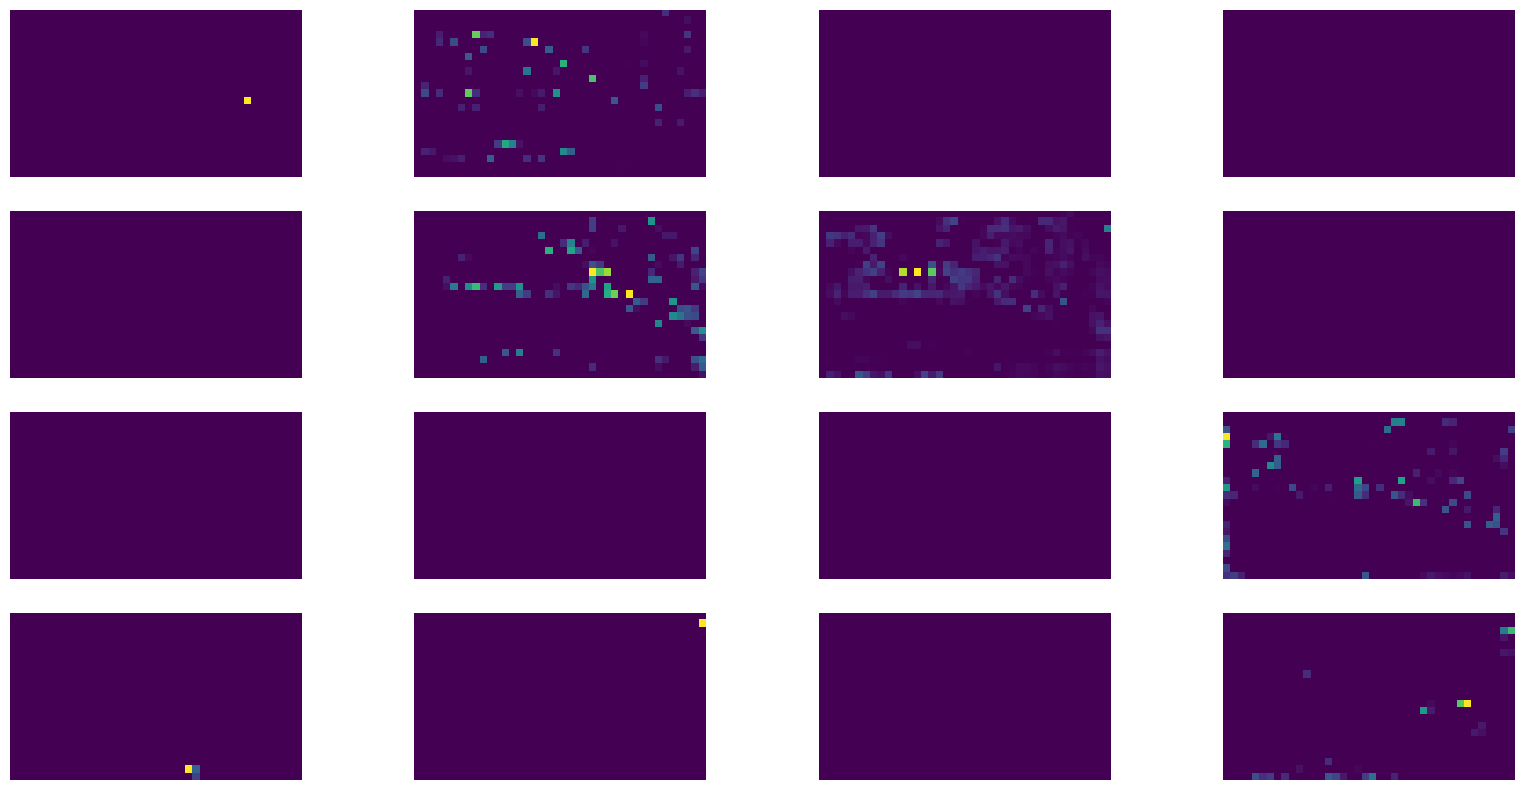

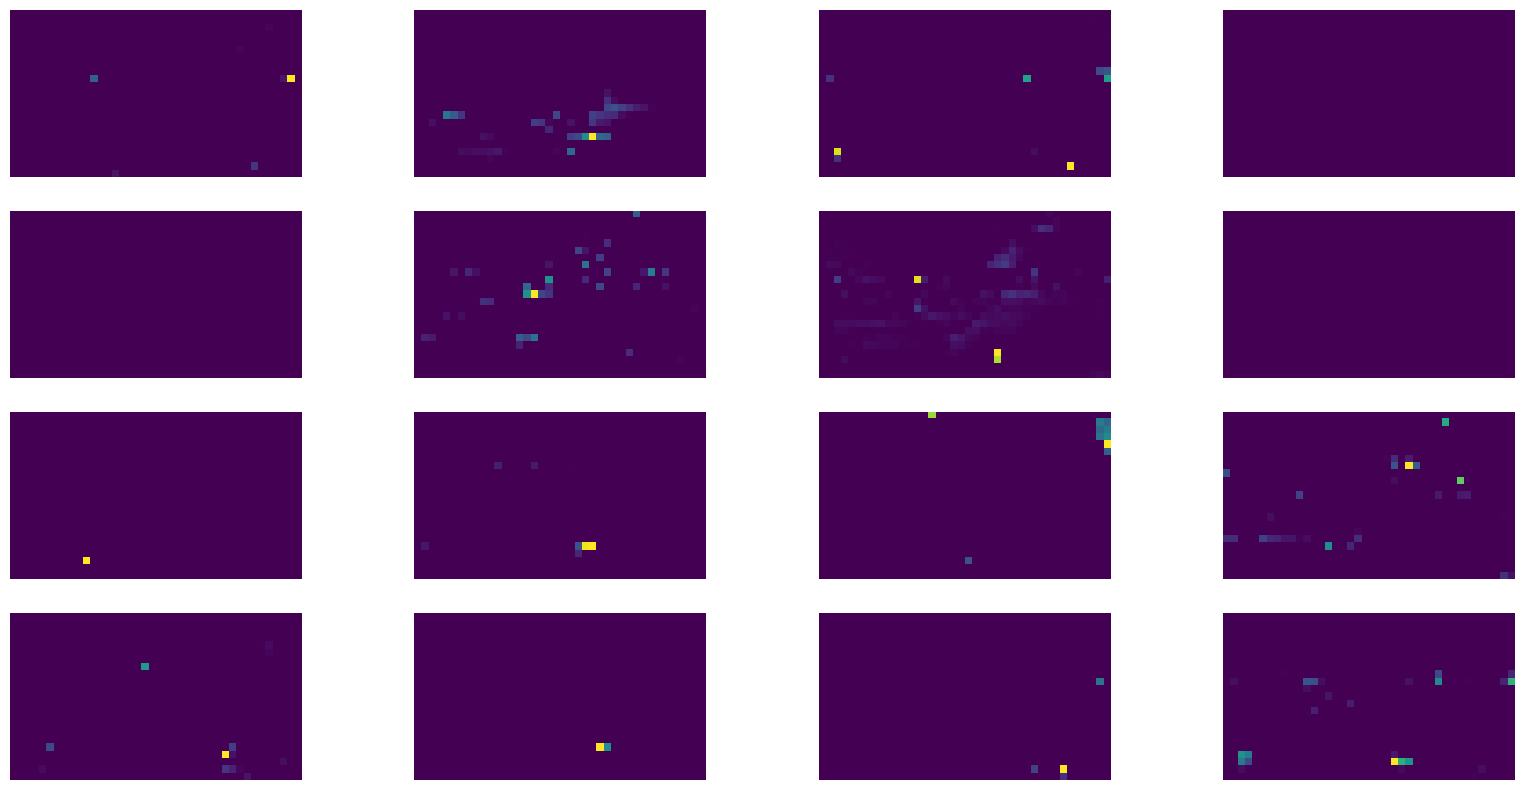

In [17]:
visualize_feature_map(light_output["2"][0])
visualize_feature_map(dark_output["2"][0])